In [0]:
!pip install -U -q kaggle
!mkdir -p ~/.kaggle
!echo '{"username":"muskang","key":"25c0d14de4a19d1e5957b5cf36f4d42a"}' > ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
from fastai.vision import *

In [0]:
!!kaggle datasets download -d nikitarom/planets-dataset
!unzip 'planets-dataset.zip'

Streaming output truncated to the last 5000 lines.
  inflating: fruits-360_dataset/fruits-360/Training/Tangelo/r_16_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tangelo/r_17_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tangelo/r_181_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tangelo/r_182_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tangelo/r_183_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tangelo/r_184_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tangelo/r_185_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tangelo/r_186_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tangelo/r_187_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tangelo/r_188_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tangelo/r_189_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tangelo/r_18_100.jpg  
  inflating: fruits-360_dataset/fruits-3

In [0]:
labels = os.listdir("/content/fruits-360_dataset/fruits-360/Training")
print("No. of labels: {}".format(len(labels)))
print("-----------------")
for label in labels:
    print("{}, {} files".format(label, len(os.listdir("/content/fruits-360_dataset/fruits-360/Training/"+label))))

No. of labels: 120
-----------------
Nectarine Flat, 480 files
Peach Flat, 492 files
Cocos, 490 files
Grape White 4, 471 files
Apple Red 2, 492 files
Plum 2, 420 files
Cantaloupe 2, 492 files
Apple Red 1, 492 files
Apple Red 3, 429 files
Cactus fruit, 490 files
Salak, 490 files
Cherry 1, 492 files
Walnut, 735 files
Huckleberry, 490 files
Kaki, 490 files
Potato Red Washed, 453 files
Pear Forelle, 702 files
Nut Pecan, 178 files
Peach, 492 files
Mandarine, 490 files
Kohlrabi, 471 files
Orange, 479 files
Blueberry, 462 files
Mangostan, 300 files
Plum 3, 900 files
Potato Red, 450 files
Tomato 2, 672 files
Banana, 490 files
Tangelo, 490 files
Eggplant, 468 files
Apple Granny Smith, 492 files
Melon Piel de Sapo, 738 files
Papaya, 492 files
Cherry Wax Black, 492 files
Lemon Meyer, 490 files
Grape Blue, 984 files
Kumquats, 490 files
Apple Crimson Snow, 444 files
Passion Fruit, 490 files
Avocado ripe, 491 files
Onion Red, 450 files
Grape White 2, 490 files
Plum, 447 files
Clementine, 490 files
M

In [0]:
df = pd.read_csv('/content/planet/planet/train_classes.csv')
df.head()

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road


In [0]:
tfms = get_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.)

In [0]:
np.random.seed(54)
path = '/content/planet/planet/'

In [0]:
src = (ImageList.from_csv(r'/content/planet/planet/', 'train_classes.csv', folder='train-jpg', suffix='.jpg')
       .split_by_rand_pct(0.2)
       .label_from_df(label_delim=' '))

In [0]:
data = (src.transform(tfms, size=128).databunch().normalize(imagenet_stats))

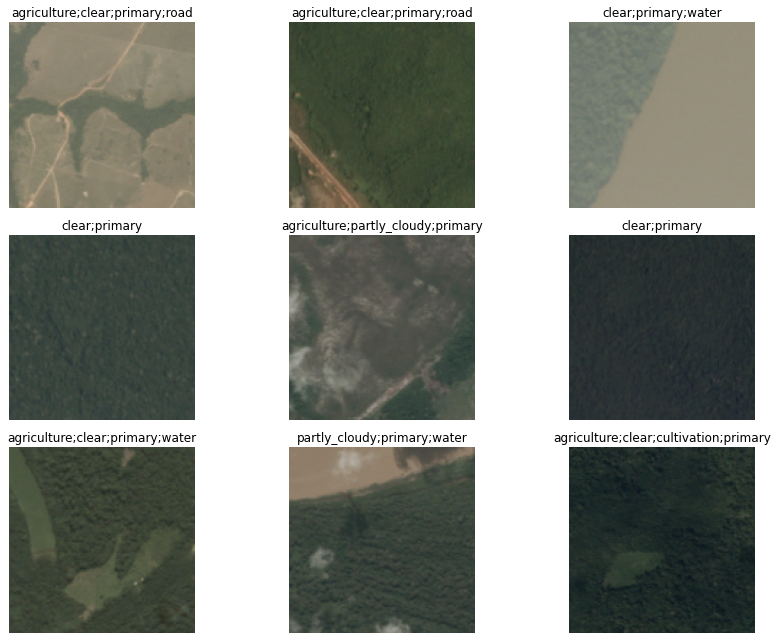

In [0]:
data.show_batch(rows=3, figsize=(12,9))

In [0]:
arch = models.resnet50
acc_02 = partial(accuracy_thresh, thresh=0.2)
f_score = partial(fbeta, thresh=0.2)

In [0]:
learner = cnn_learner(data, arch, metrics=[acc_02, f_score])

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


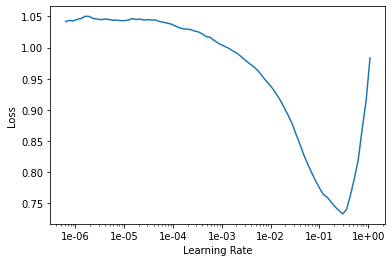

In [0]:
learner.lr_find() 
learner.recorder.plot()

In [0]:
learner.fit_one_cycle(6, max_lr=slice(1e-1, 1e-0))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,3.328578,557.107605,0.697708,0.560613,02:47
1,8.510954,11026.711914,0.559198,0.558301,02:46
2,5.136247,11.953966,0.787378,0.679114,02:44
3,1.180867,1.736077,0.871678,0.759223,02:43
4,0.244532,15.275861,0.895469,0.787912,02:43
5,0.172290,0.417675,0.916383,0.847329,02:44
